Import Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

Load the dataset

In [2]:
file_path = 'spotify_songs.csv'  
dataset = pd.read_csv(file_path)

In [3]:
dataset.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


Shape of the data

In [4]:
print(f"Shape of the data --> {dataset.shape}")

Shape of the data --> (18454, 25)


Information of the data

In [5]:
print("Dataset Information:")
dataset.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_id            18454 non-null  object 
 6   track_album_name          18454 non-null  object 
 7   track_album_release_date  18454 non-null  object 
 8   playlist_name             18454 non-null  object 
 9   playlist_id               18454 non-null  object 
 10  playlist_genre            18454 non-null  object 
 11  playlist_subgenre         18454 non-null  object 
 12  danceability              18454 non-null  float64
 13  energy                    18454 non-null

Describe the dataset

* For Numeric Categories

In [6]:
dataset.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
track_popularity,18454.0,42.438821,24.616740,0.000000,24.0000,48.000000,62.00000,100.000
danceability,18454.0,0.644066,0.150071,0.098500,0.5460,0.660000,0.75500,0.979
energy,18454.0,0.692289,0.180635,0.016700,0.5730,0.715000,0.83500,1.000
key,18454.0,5.342094,3.613121,0.000000,2.0000,6.000000,9.00000,11.000
loudness,18454.0,-6.769159,2.920757,-34.283000,-8.2490,-6.227000,-4.71900,1.275
mode,18454.0,0.580525,0.493487,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,18454.0,0.106192,0.102291,0.022400,0.0397,0.060300,0.13000,0.918
acousticness,18454.0,0.175348,0.217795,0.000001,0.0161,0.081900,0.25400,0.992
instrumentalness,18454.0,0.051216,0.168263,0.000000,0.0000,0.000009,0.00172,0.987
liveness,18454.0,0.189593,0.153751,0.009360,0.0927,0.128000,0.24600,0.996


* For Objective Features

In [7]:
dataset.describe(include='object').T

,count,unique,top,freq
track_id,18454,18454,0017A6SJgTbfQVU2EtsPNo,1
track_name,18454,15198,Poison,13
track_artist,18454,6031,Queen,125
lyrics,18194,15977,Lyrics for this song have yet to be released. ...,48
track_album_id,18454,14278,6GeHCNwwqMMUrpxuGTRYcf,16
track_album_name,18454,12671,Greatest Hits,108
track_album_release_date,18454,3817,2013-01-01,165
playlist_name,18454,442,Indie Poptimism,258
playlist_id,18454,464,3E88dLx4fgFYY70gdGzdnB,94
playlist_genre,18454,6,pop,3993


Check For missing Values

In [8]:
print("Missing Values:")
dataset.isnull().sum().sort_values(ascending=False)

Missing Values:


language                    260
lyrics                      260
energy                        0
duration_ms                   0
tempo                         0
valence                       0
liveness                      0
instrumentalness              0
acousticness                  0
speechiness                   0
mode                          0
loudness                      0
key                           0
track_id                      0
track_name                    0
playlist_subgenre             0
playlist_genre                0
playlist_id                   0
playlist_name                 0
track_album_release_date      0
track_album_name              0
track_album_id                0
track_popularity              0
track_artist                  0
danceability                  0
dtype: int64

Drop Null Values

In [9]:
dataset.dropna(subset=['lyrics', 'language'], inplace=True)

In [10]:
dataset.isnull().sum().sum()

0

* Now, We do not have any NULL Values as we have handled those values.

Remove the duplicate Rows

In [11]:
dataset.drop_duplicates(inplace=True)

Segregate the numrical and categorical Feature

In [12]:
numeric_features = dataset.select_dtypes(include=['number']).columns.tolist()
categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.tolist()

In [13]:
display(numeric_features)
display(categorical_features)

['track_popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

['track_id',
 'track_name',
 'track_artist',
 'lyrics',
 'track_album_id',
 'track_album_name',
 'track_album_release_date',
 'playlist_name',
 'playlist_id',
 'playlist_genre',
 'playlist_subgenre',
 'language']

Checking Outliers in Dataset

Checking Outlier for track_popularity


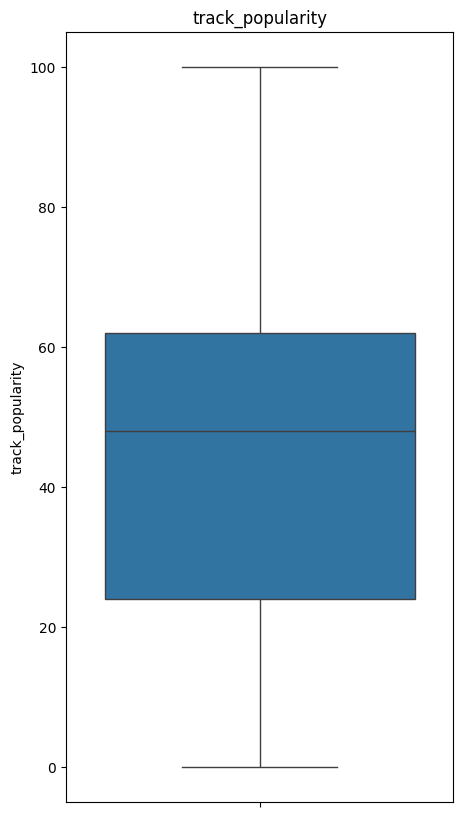

Checking Outlier for danceability


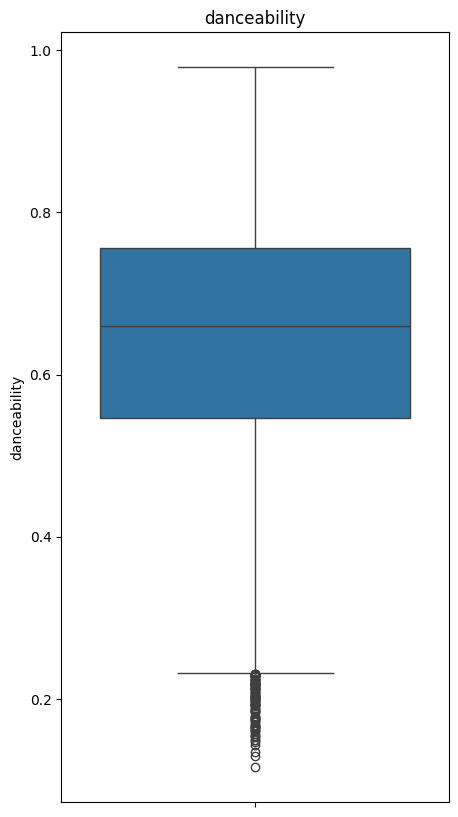

Checking Outlier for energy


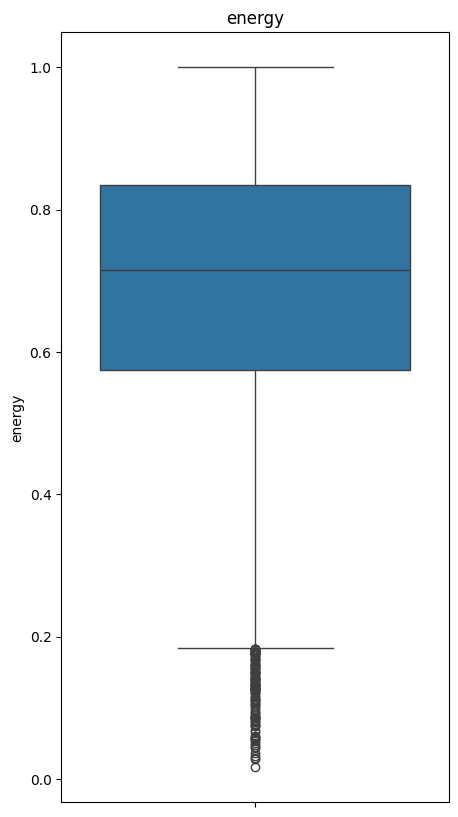

Checking Outlier for key


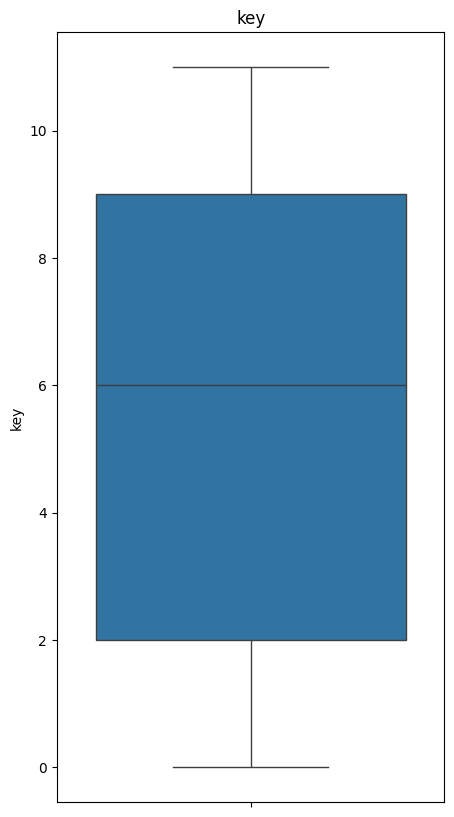

Checking Outlier for loudness


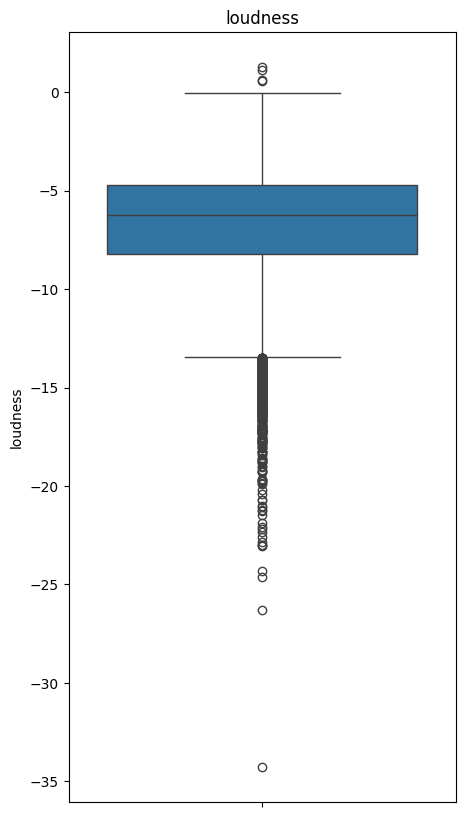

Checking Outlier for mode


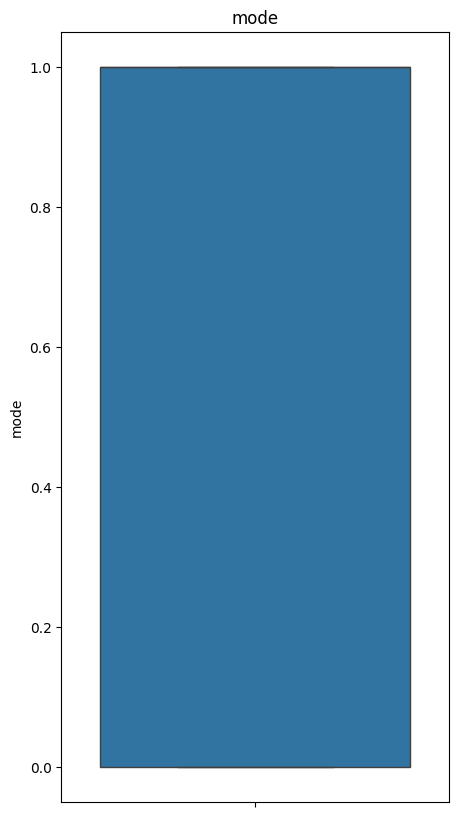

Checking Outlier for speechiness


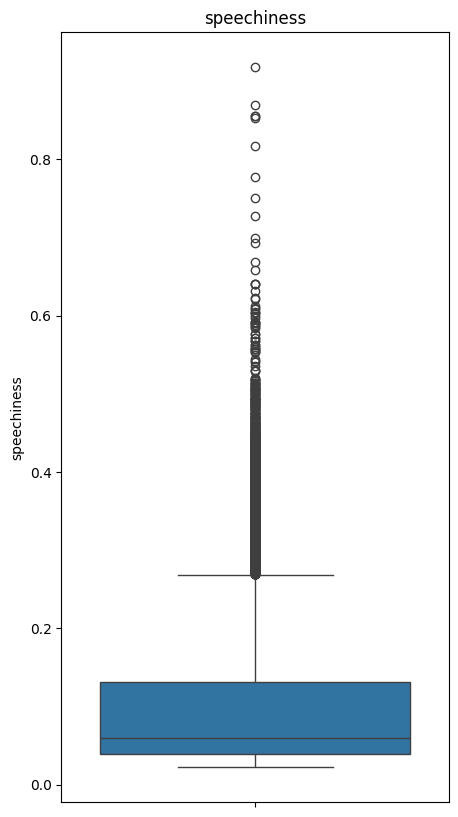

Checking Outlier for acousticness


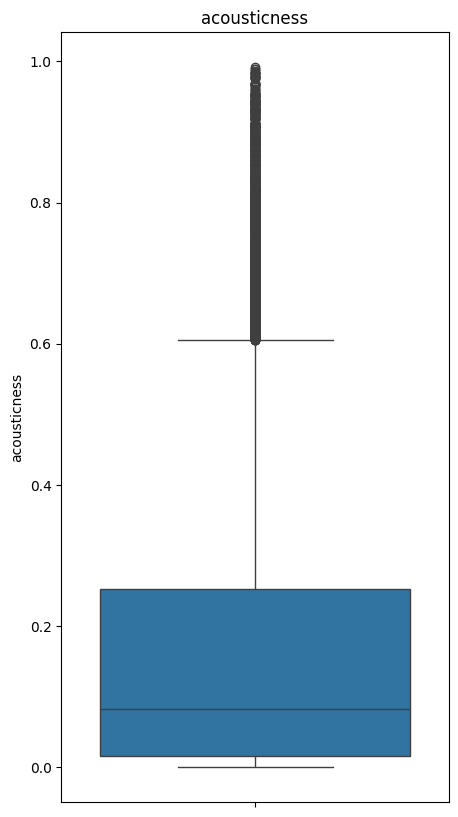

Checking Outlier for instrumentalness


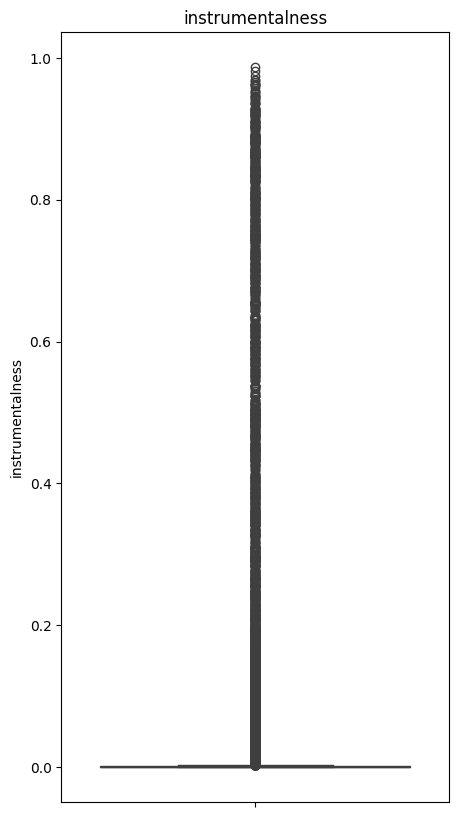

Checking Outlier for liveness


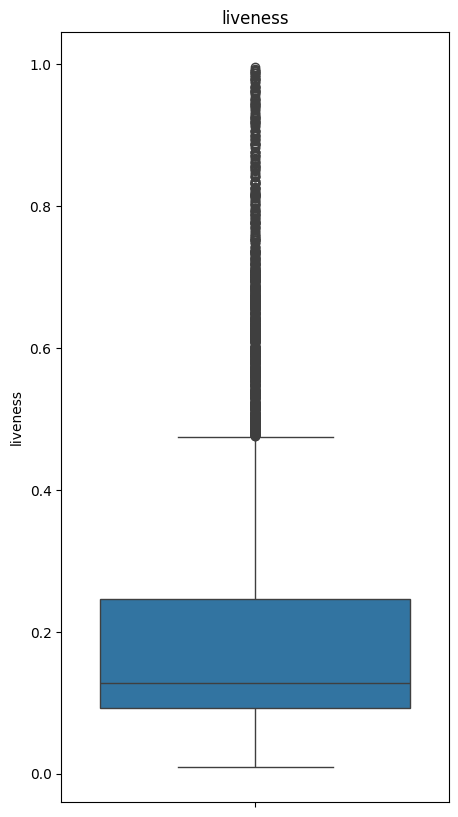

Checking Outlier for valence


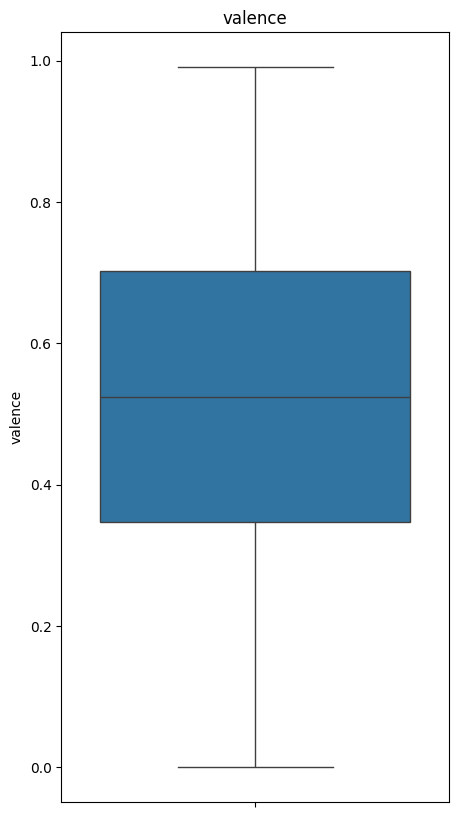

Checking Outlier for tempo


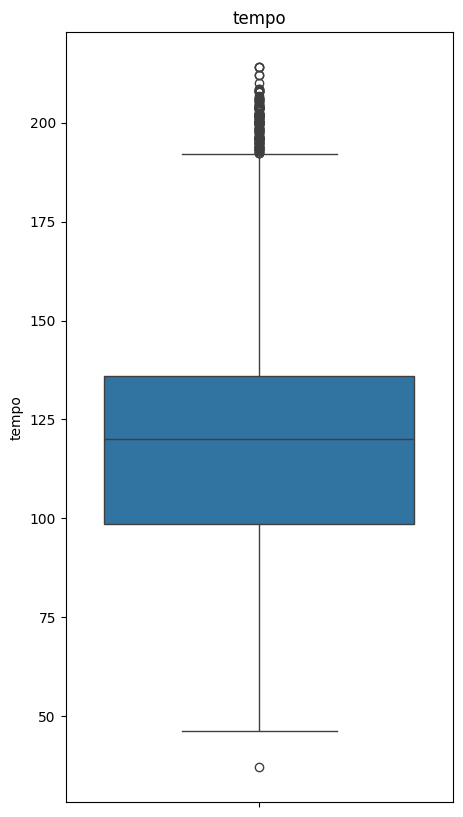

Checking Outlier for duration_ms


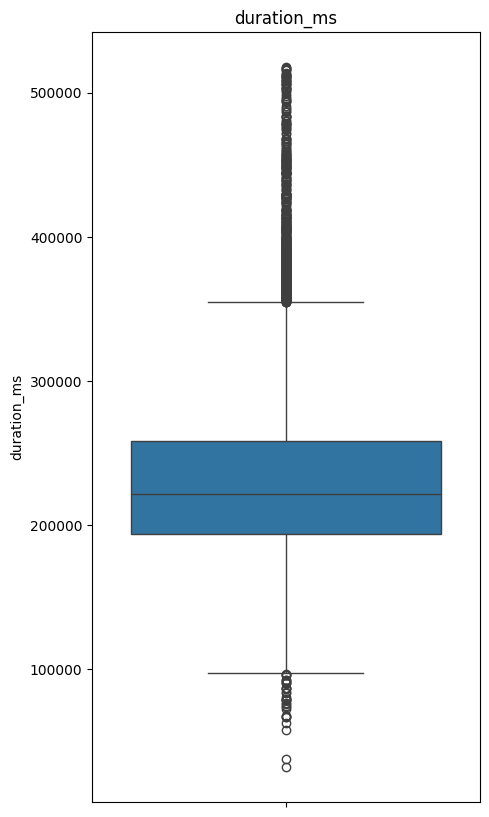

In [14]:
for col in numeric_features:
    print(f"Checking Outlier for {col}")
    plt.figure(figsize=(5,10))
    sns.boxplot(data=dataset, y=col)
    plt.title(f'{col}')
    plt.show()

Define a function for detect outliers

In [15]:
def detect_outliers(numerical_cols, df):

    outlier_counts = pd.Series(index=numerical_cols, dtype=int)
 
    for col in numerical_cols:
        
        # Dividing into quaritle range of 25% and 75%
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Creating lower and upper bound with 25th and 75th quartile range       
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Counting the outliers which are below lower bound and higher than upper bound
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

        outlier_counts[col] = outlier_count

    return outlier_counts

Define a function for remove outliers

In [16]:
def remove_outliers(numerical_cols, df):
    
    for col in numerical_cols:

        # Dividing into quaritle range of 25% and 75%
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Creating lower and upper bound with 25th and 75th quartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Removing the outliers which are below lower bound and higher than upper bound
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

Total number of outliers are reduced from 9428 to 3653


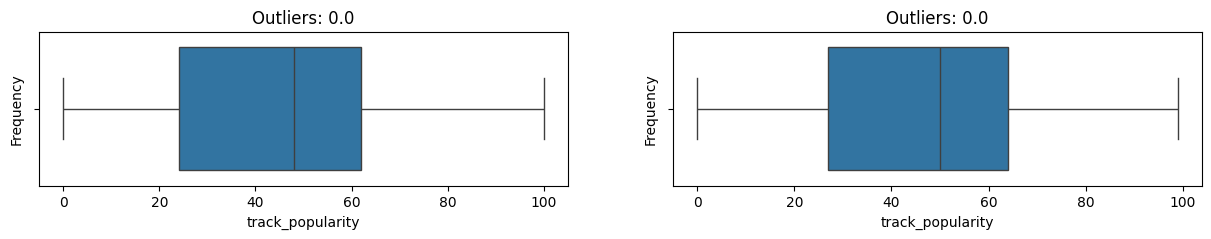

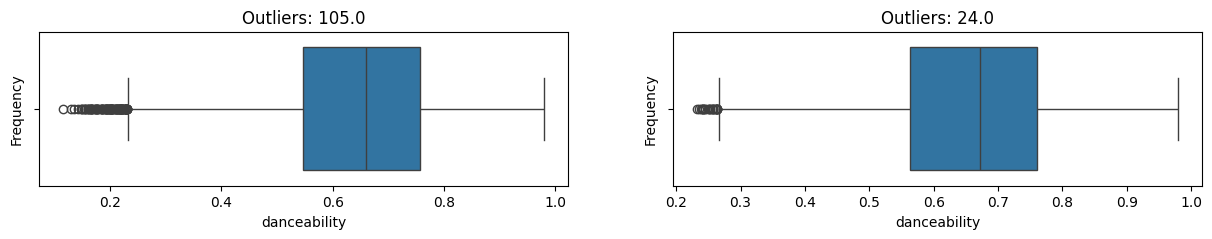

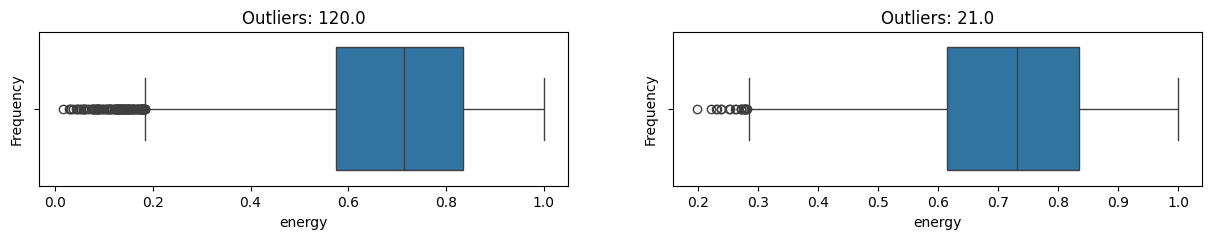

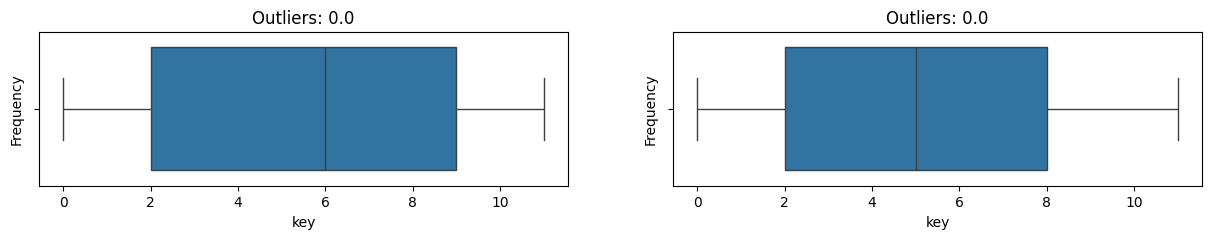

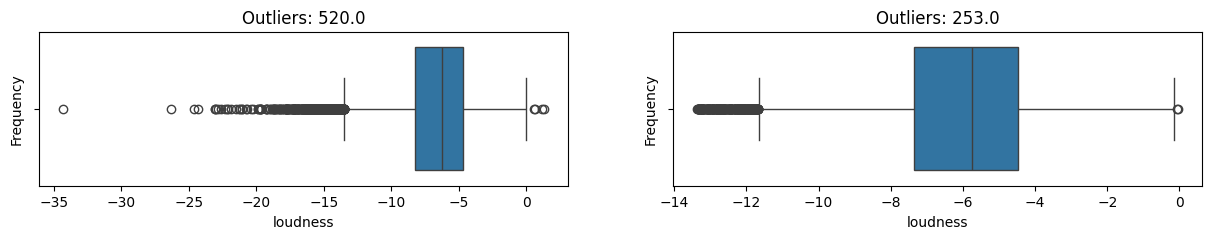

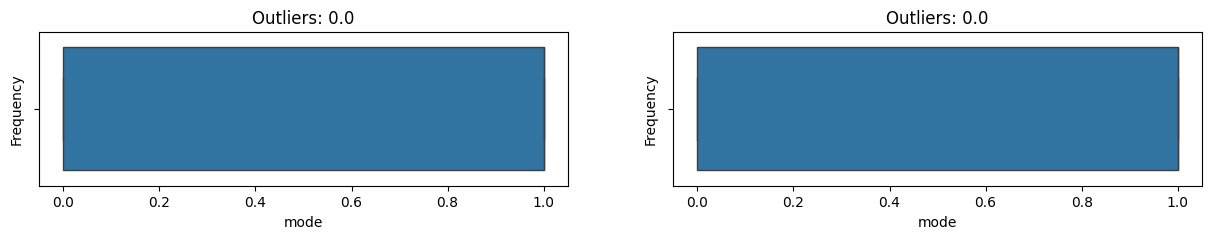

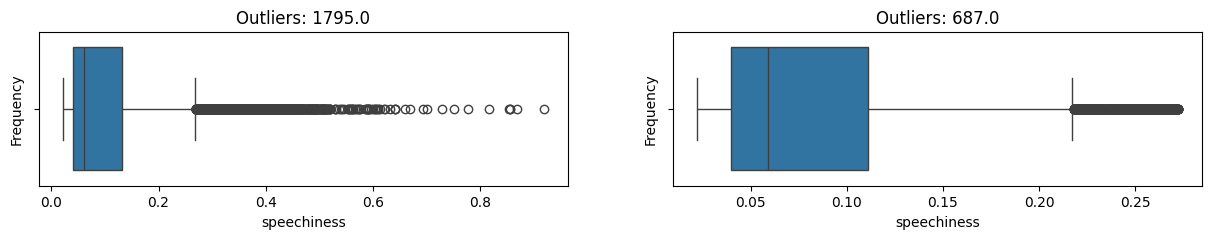

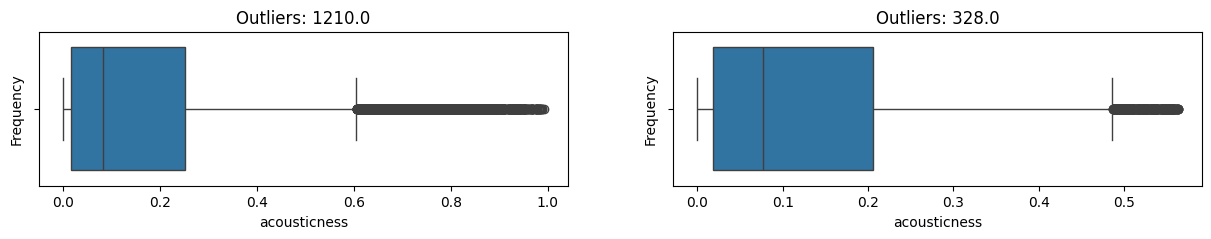

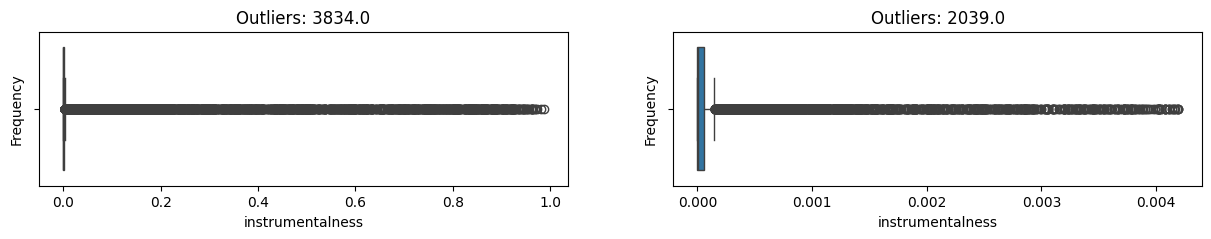

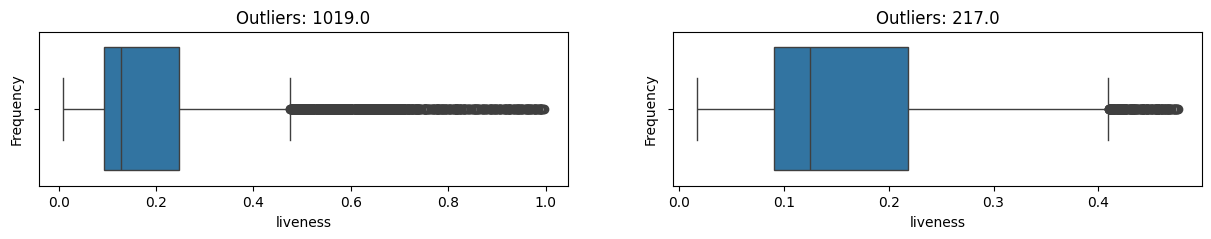

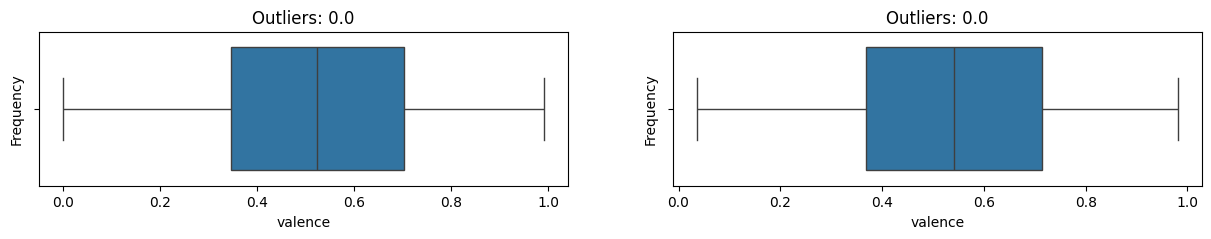

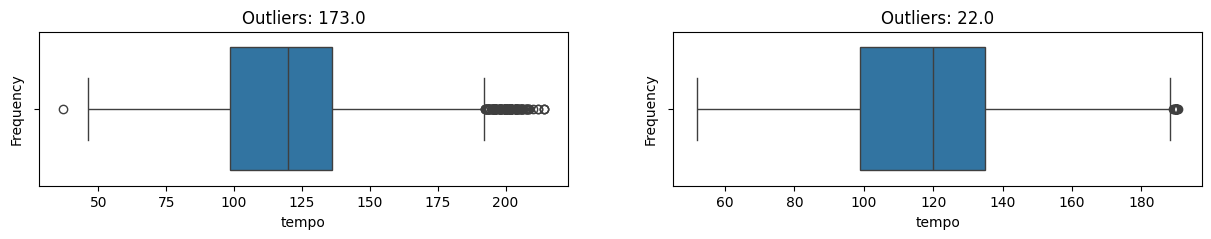

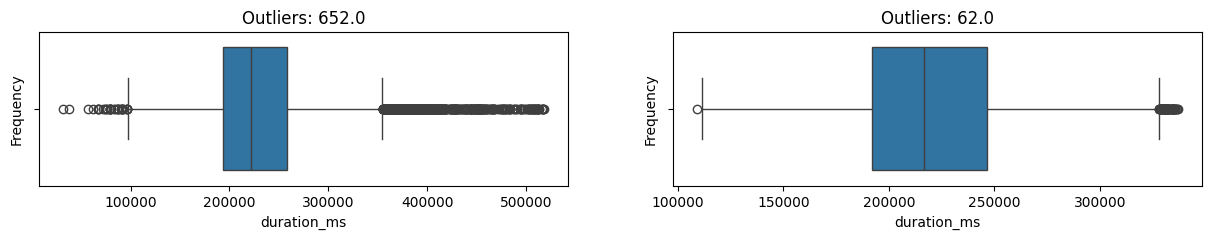

In [17]:
dataset_result = detect_outliers(numeric_features, dataset)
removed_outliers_dataset = remove_outliers(numeric_features, dataset)
neg_outliers_result = detect_outliers(numeric_features, removed_outliers_dataset)

outliers_sensitive_features = list()

print(f"Total number of outliers are reduced from {int(dataset_result.sum())} to {int(neg_outliers_result.sum())}")

for col in numeric_features:
    
    plt.figure(figsize=(15,2))
    plt.subplot(1,2,1)
    sns.boxplot(x = col, data = dataset)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Outliers: {(dataset_result[col])}")
    
    plt.subplot(1,2,2)
    sns.boxplot(x = col, data = removed_outliers_dataset)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Outliers: {(neg_outliers_result[col])}")
    
    if neg_outliers_result[col] > 10:
        outliers_sensitive_features.append(col)
        
    plt.show()
    
dataset = removed_outliers_dataset

In [18]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
track_popularity,10579.0,44.259949,24.755112,0.000000,27.00000,50.000000,64.00000,99.00000
danceability,10579.0,0.657051,0.139674,0.233000,0.56300,0.672000,0.76100,0.97900
energy,10579.0,0.716623,0.150954,0.199000,0.61400,0.731000,0.83500,0.99900
key,10579.0,5.285282,3.610176,0.000000,2.00000,5.000000,8.00000,11.00000
loudness,10579.0,-6.069343,2.261937,-13.357000,-7.34550,-5.735000,-4.46400,-0.04600
mode,10579.0,0.585311,0.492692,0.000000,0.00000,1.000000,1.00000,1.00000
speechiness,10579.0,0.085240,0.062230,0.022400,0.04000,0.059200,0.11100,0.27200
acousticness,10579.0,0.131907,0.142708,0.000005,0.01830,0.076600,0.20550,0.56300
instrumentalness,10579.0,0.000232,0.000645,0.000000,0.00000,0.000001,0.00006,0.00419
liveness,10579.0,0.162968,0.099853,0.017100,0.09065,0.125000,0.21800,0.47600


Text Analysis: Check for Unusually Long or Short Texts

In [19]:
# Check for unusually long or short lyrics
dataset['lyrics_length'] = dataset['lyrics'].str.len()
long_texts = dataset[dataset['lyrics_length'] > dataset['lyrics_length'].mean() + 2 * dataset['lyrics_length'].std()]
short_texts = dataset[dataset['lyrics_length'] < dataset['lyrics_length'].mean() - 2 * dataset['lyrics_length'].std()]

# Display examples of unusually long texts
print("Examples of unusually long texts:")
for index, row in long_texts.head().iterrows():
    print(f"Index: {index}, Length: {row['lyrics_length']}, Lyrics: {row['lyrics']}")
print()

# Display examples of unusually short texts
print("Examples of unusually short texts:")
for index, row in short_texts.head().iterrows():
    print(f"Index: {index}, Length: {row['lyrics_length']}, Lyrics: {row['lyrics']}")
print()

Examples of unusually long texts:
Index: 27, Length: 6921, Lyrics: Intro : (Flavor Flav) To the beat Ya'll Ah yeah(Ya don't stop) Sound good to me This sound hard, somethin' funky people gon' dance to Give the record a second and a chance to Hittin' people like a scene of amazement While they slippin' back, my feet is planted in the pavement Crumble I can never do So now I'm lookin' dead at you What are you gonna do? You listen to the knowledge of a scholar You say "How Breed?" tell em how I holler I'm the E Double, and I proclaim my name Straight up good game, peeps all game I'm like a rhino runnin' through the roughest pack They figure I'm a trigga-happy nigga, so they step back Breed, the microphonist Boot last the longest The noose's the strongest It ain't a game, that's plain to see You listen to the sounds of Breed (and the DFC) There ain't no future in your frontin' I never got caught with a kilo And if you ever do, yo, it will never be with me, yo Servin' in a Cherokee or maybe

Word cloud for lyrics

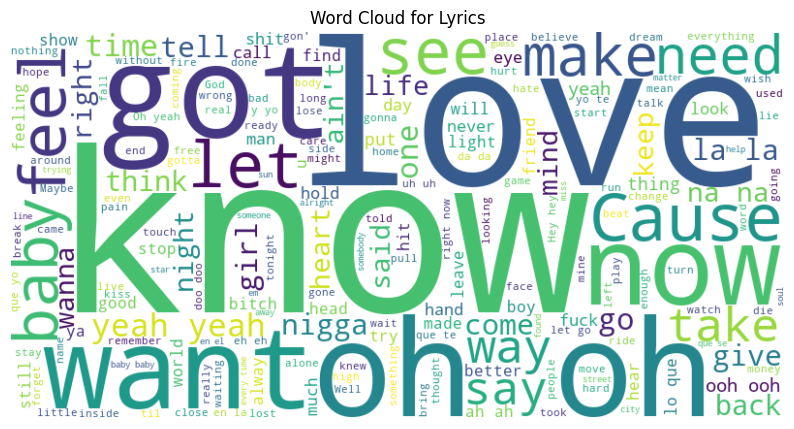

In [20]:
from wordcloud import WordCloud

# Combine all lyrics into a single string
all_lyrics = ' '.join(dataset['lyrics'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Lyrics")
plt.axis('off')
plt.show()


* We create a word cloud visualization to showcase the most frequent words in the lyrics of the songs.
* The lyrics from all songs are combined into a single string, and a word cloud is generated based on the frequency of words.
* This visualization provides a visually appealing representation of the most common words found in the lyrics, offering insights into the prevalent themes or topics in the dataset.

Count plot for distribution of songs across different genres

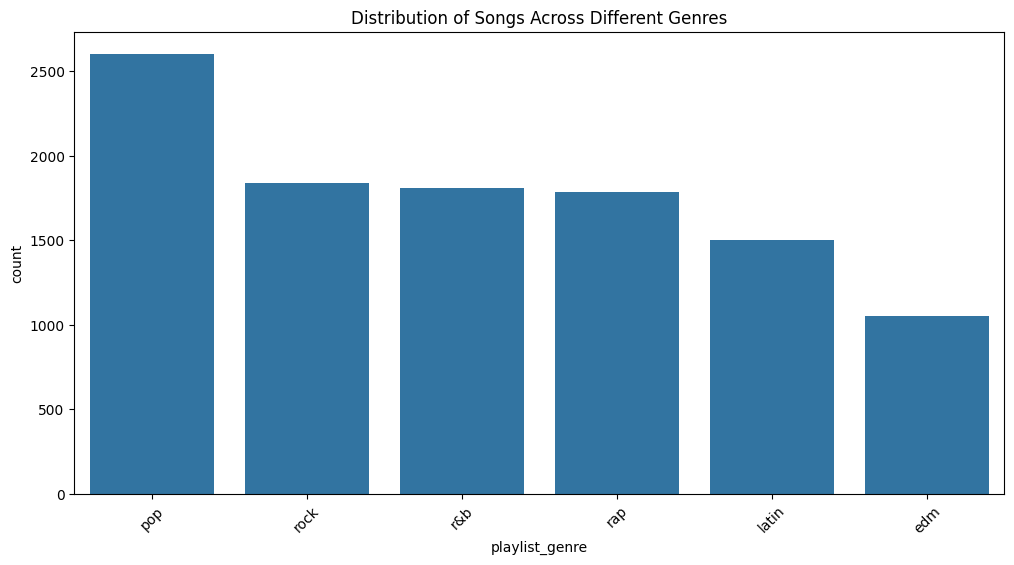

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='playlist_genre', data=dataset, order=dataset['playlist_genre'].value_counts().index)
plt.title("Distribution of Songs Across Different Genres")
plt.xticks(rotation=45)
plt.show()

Scatter plot for energy vs. track popularity, colored by genre

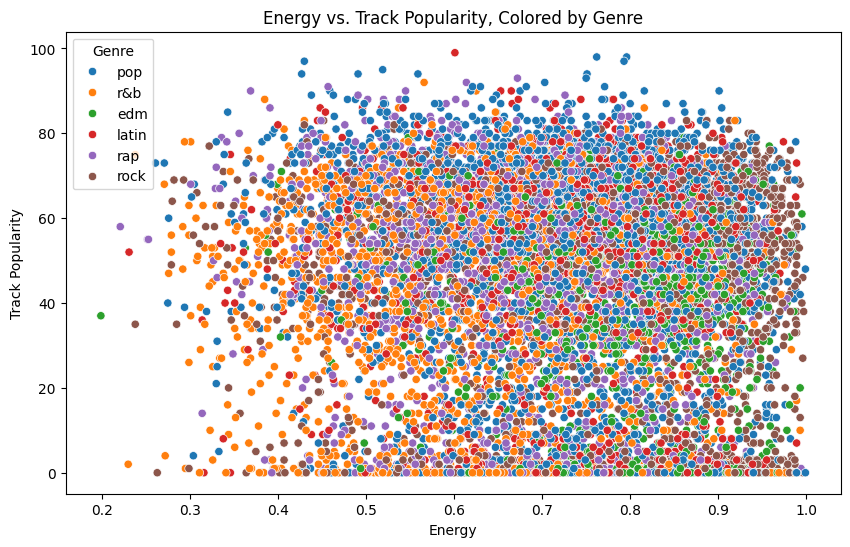

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='track_popularity', hue='playlist_genre', data=dataset)
plt.title("Energy vs. Track Popularity, Colored by Genre")
plt.xlabel("Energy")
plt.ylabel("Track Popularity")
plt.legend(title="Genre")
plt.show()

Genre Distribution

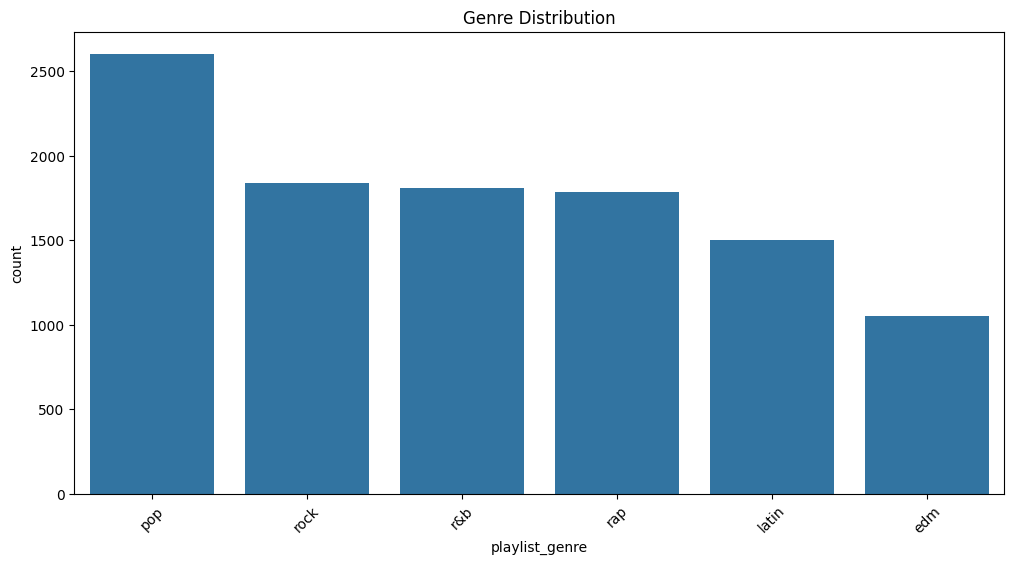

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='playlist_genre', data=dataset, order=dataset['playlist_genre'].value_counts().index)
plt.title("Genre Distribution")
plt.xticks(rotation=45)
plt.show()

# Top 10 most frequent artists

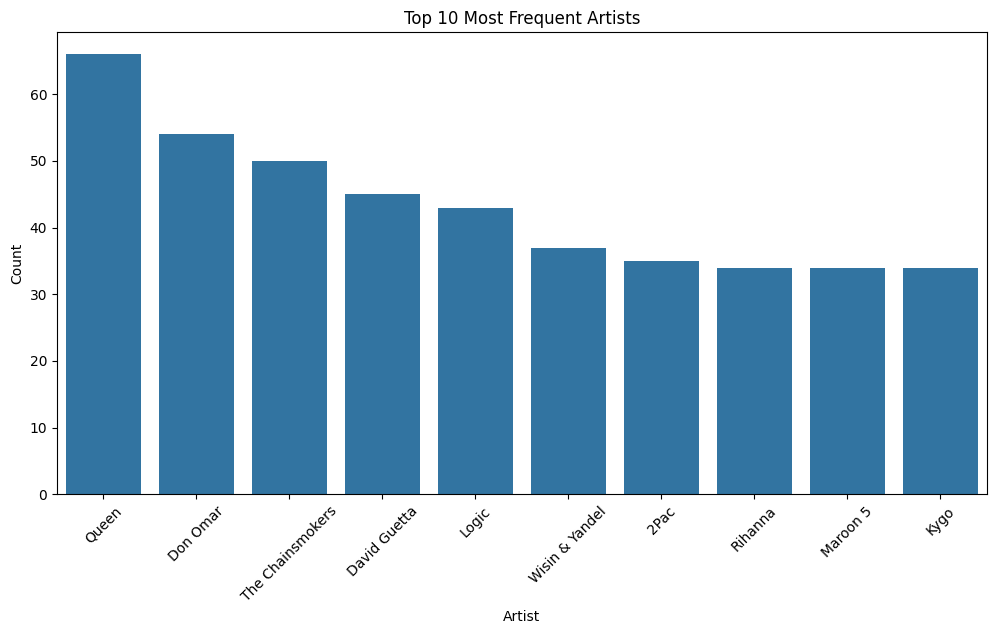

In [28]:
top_artists = dataset['track_artist'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.title("Top 10 Most Frequent Artists")
plt.xlabel("Artist")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Correlation Matrix

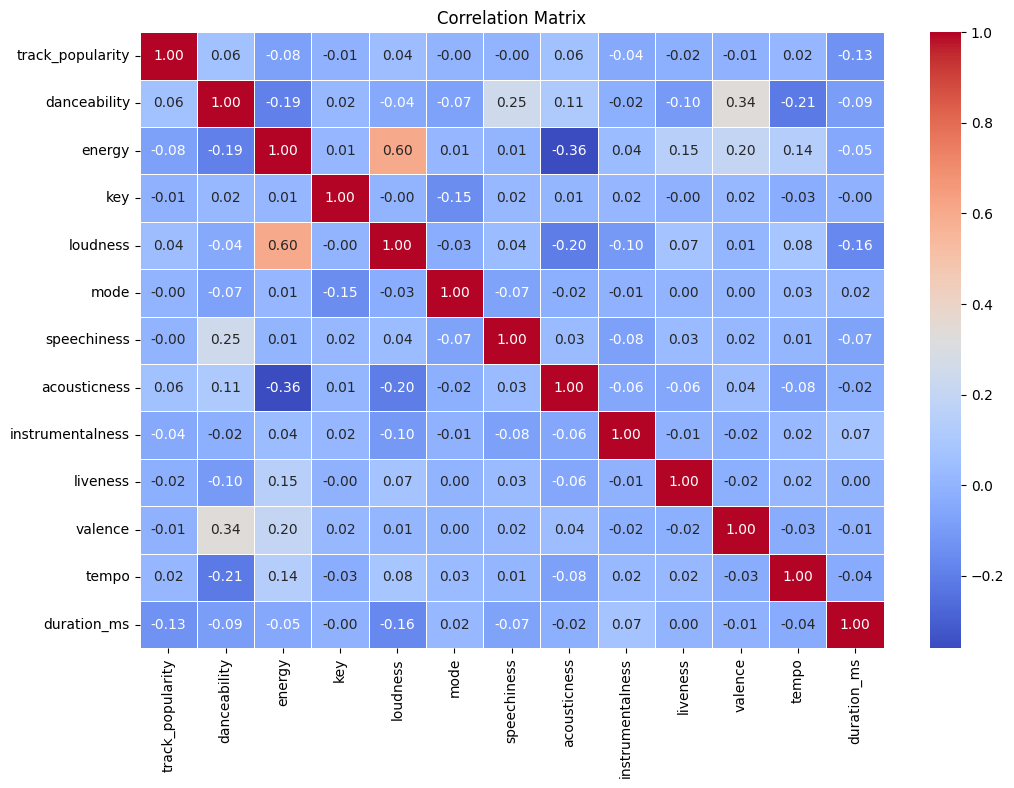

In [30]:
plt.figure(figsize=(12, 8))
correlation_matrix = dataset[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

Genre-wise Popularity Distribution

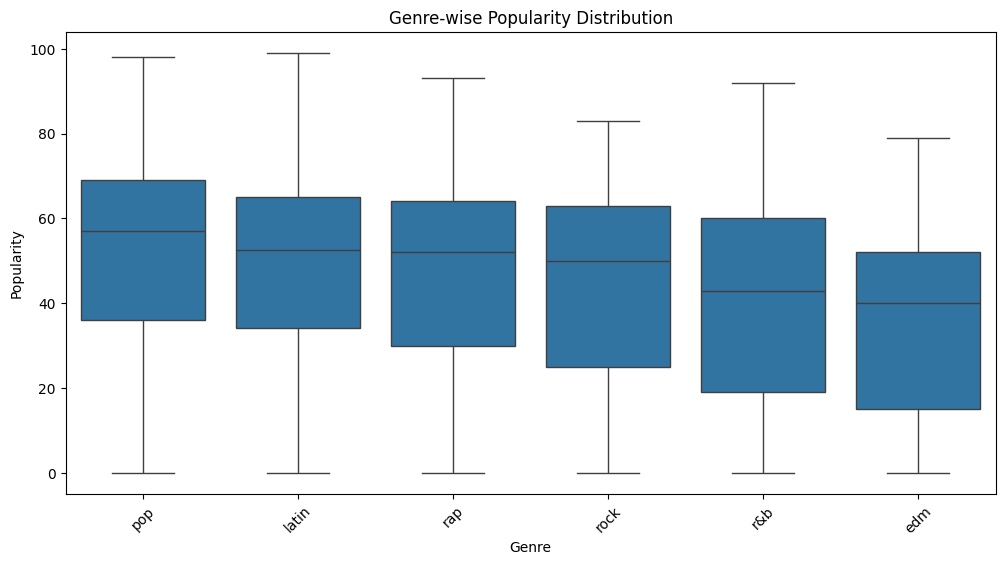

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='playlist_genre', y='track_popularity', data=dataset, order=dataset.groupby('playlist_genre')['track_popularity'].median().sort_values(ascending=False).index)
plt.title("Genre-wise Popularity Distribution")
plt.xticks(rotation=45)
plt.ylabel("Popularity")
plt.xlabel("Genre")
plt.show()

Artist-wise Popularity Distribution

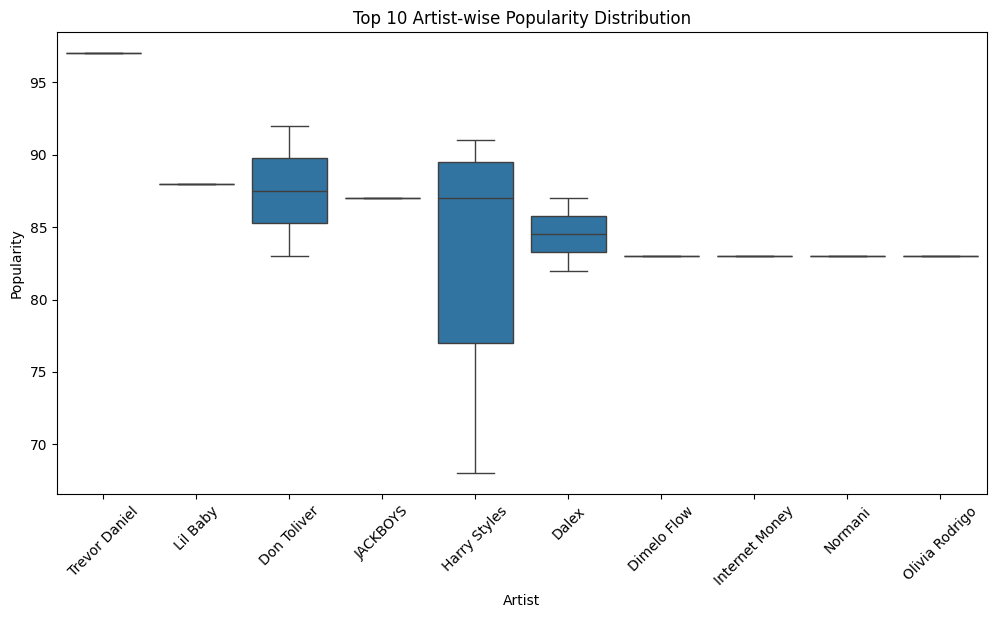

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='track_artist', y='track_popularity', data=dataset, order=dataset.groupby('track_artist')['track_popularity'].median().sort_values(ascending=False).index[:10])
plt.title("Top 10 Artist-wise Popularity Distribution")
plt.xticks(rotation=45)
plt.ylabel("Popularity")
plt.xlabel("Artist")
plt.show()

In [37]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPTNeoForCausalLM

# Load the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-2.7B")
model = GPTNeoForCausalLM.from_pretrained("EleutherAI/gpt-neo-2.7B")

# Define the prompt
prompt = "I want to grow with you"

# Encode the input prompt
inputs = tokenizer(prompt, return_tensors='pt')

# Generate the output
outputs = model.generate(
    inputs['input_ids'],
    max_length=100,
    num_return_sequences=1,
    temperature=0.7,
    top_p=0.9,
    top_k=50,
    no_repeat_ngram_size=2,
    early_stopping=True
)

# Decode and print the generated lyrics
generated_lyrics = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_lyrics)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I want to grow with you, and I want you to be happy. I don't want us to have to fight, but I also don’t want it to end.”

“I know,�  I‘m sorry. But I‚Äôm not going to give up. We‛Å¡ll find a way. You‟Æªre my best friend. And I love you.


In [38]:
# Define the prompt
prompt = "Underneath the neon lights, we dance through the moon lights"

# Encode the input prompt
inputs = tokenizer(prompt, return_tensors='pt')

# Generate the output
outputs = model.generate(
    inputs['input_ids'],
    max_length=100,
    num_return_sequences=1,
    temperature=0.7,
    top_p=0.9,
    top_k=50,
    no_repeat_ngram_size=2,
    early_stopping=True
)

# Decode and print the generated lyrics
generated_lyrics = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_lyrics)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Underneath the neon lights, we dance through the moon lights.

We dance in the dark. We dance on the edge of the world. And we don’t care. Because we‘re not afraid. Not anymore.
